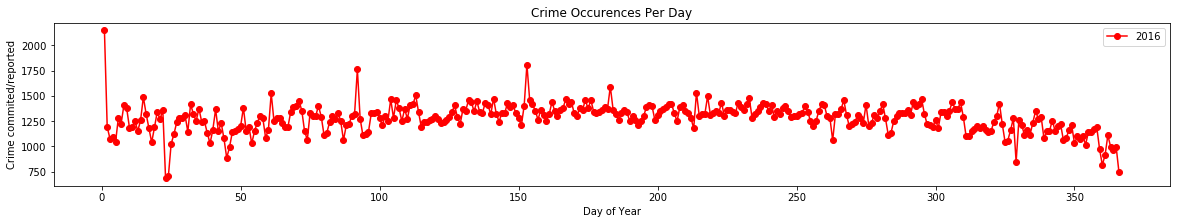

In [2]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

pattern=re.compile("^\('(\d{2}/\d{2}/\d{4})',\s(\d*)\)")
year=2016

def plotgraph(data):
    lists = sorted(data.items()) # sorted by key, return a list of tuples
    daynumber, frequency = zip(*lists) # unpack a list of pairs into two tuples
    #Plot data
    fig = plt.figure(figsize = (20,3))
    plt.title('Crime Occurences Per Day')
    plt.ylabel('Crime commited/reported')
    plt.xlabel('Day of Year')
    plt.plot(daynumber, frequency, marker='o',label=str(year),color='r')
    plt.legend()
    fig.savefig("crime-plots-by-year/crime_"+str(year)+".png")
    plt.show()

with open("crime-data-by-year/"+str(year)+"_data.out") as ins:
    data={}
    crime_per_day={}
    for line in ins:
        tuple=pattern.match(line)
        date=datetime.strptime(tuple[1],'%m/%d/%Y').date().toordinal();
        crimecount=int(tuple[2])
        data[date]=crimecount
    year_start_date=datetime(int(year),1,1)
    for k,v in data.items():
        date=datetime.fromordinal(k)
        day_number=int(format(date, '%j'))
        crime_per_day[day_number]=v
       # print(k,v,day_number)   
    plotgraph(crime_per_day)
    data={}
    crime_per_day={}
        
        


    